In [1]:
import osmnx as ox
import networkx as nx
from pyproj import CRS
from shapely.strtree import STRtree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import time

import warnings
warnings.filterwarnings("ignore")

G = ox.load_graphml('./data/Westminster.graphml')

In [7]:
def pollutance(length, ascent, greenness):
    return greenness

projection = CRS.from_epsg(3067)
nodes, edges = ox.graph_to_gdfs(G)
edges = edges.to_crs(projection)
nodes = nodes.to_crs(projection)

for _, _, _, data in G.edges(keys=True, data=True):
    data["greenness"] = float(data["greenness"])
    data["pollutance"] = pollutance(data["length"], data["ascent"], data["greenness"])

0.9872677496011417 0.8626486328849643


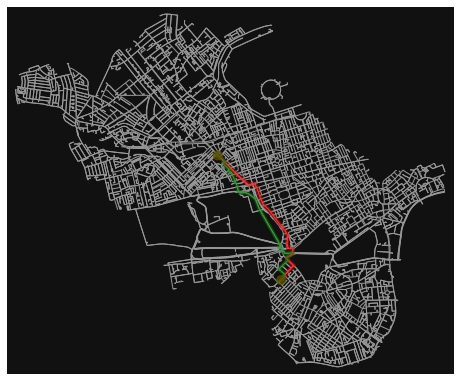

In [9]:
orig = list(G)[np.random.randint(len(list(G)))]
dest = list(G)[np.random.randint(len(list(G)))]

short = ox.shortest_path(G, orig, dest, weight='travel_time')
green = ox.shortest_path(G, orig, dest, weight='greenness')

short_green = (np.mean(ox.utils_graph.get_route_edge_attributes(G, short, "greenness")))
green_green = (np.mean(ox.utils_graph.get_route_edge_attributes(G, green, "greenness")))
print(short_green, green_green)

fig, ax = ox.plot_graph_routes(G, routes=[short, green], route_colors=['r','g'], node_size=0)
plt.show()